In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Evaluating classification model

## Overview of model evaluation

    - When we need to select different model types, tuning parameters, and features

### Basic Concepts 


#### Model evaluation procedures

The procedure (steps) to evaluate how well a model will generalize to out-of-sample data 

1. **Training and testing on the same data**
     - the worst case! If you have enough data - never train and test on same data.
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data    
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together    
    - Runs "K" times slower than train/test split, but more accurate.

#### Model evaluation metric (Loss Function)

A metric to evaluate how well specific algorithm models the given data ( how well the algorithm fits the data ). 

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Loss function

In order to evaluate how well a function fits the training data (i.e. how well specific algorithm models the given data), the *loss* function is defined as:

$L: \hat{Y} \times Y \to \Bbb{R} ^{\ge 0}$, where 

<div style="margin-left:1em">

$Y$ - the set of [ground truth](https://en.wikipedia.org/wiki/Ground_truth) values for given input data

$\hat{Y}$ - the set of predicted values

$\Bbb{R}$ - the set of real numbers
</div>
		
I.e. if we have the training samples ${(x_{i},\;y_{i})}$, then the the loss of predicting the value ${{\hat {y}}}$ is ${L(y_i,\hat{y})}$.

Usually, in the same context, is used the term *cost* function, which can be regarded as a generalization of the lost function.

**There’s no one-size-fits-all loss function to algorithms in machine learning.**

Generally, loss functions can be classified into two major categories depending upon the type of learning task we are dealing with: Regression losses and Classification losses.

### Regression Losses

*Note that scikit-learn implements a good quantity of regression metrics: [Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)*

If you want to read more, check: [alt](https://medium.com/analytics-vidhya/a-comprehensive-guide-to-loss-functions-part-1-regression-ff8b847675d6)


Next notation will be used notes bellow:

$n$        - Number of training examples.
	
$i$        - $i$ th training example in a data set.

$y_{i}$     - Ground truth label for ith training example.
	
$\hat y_{i}$- Prediction for ith training example (y_hat(i))

#### Mean square error (MSE)

Mean square error is measured as the average of squared difference between predictions and actual observations.

${MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2} $

Due to squaring, **MSE "punishes" bigger errors**, which is quite useful in the real world



In [2]:
# Calculating MSE with Python and numpy:
def calc_mse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()

	return mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

mse = calc_mse(Y_pred, Y_true)

print(f'MSE = {mse:.5f}')

MSE = 0.14790


In [3]:
# Calculating MSE with Scikit-learn:
Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(Y_true,Y_pred,squared=True)
print(f'MSE = {mse:.5f}')


MSE = 0.14790


/media/nemsys/data/projects/courses/common/JupyterNotebooksExamples/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Root Mean Squared Error

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

RMSE is easilly interpretable in the "y" units.

In [4]:
# Calculating RMSE with Python and numpy:
def calc_rmse(Y_pred, Y_true):
	differences_squared = (Y_pred - Y_true) ** 2
	mean_of_differences_squared = differences_squared.mean()
	root_mean_of_differences_squared = np.sqrt(mean_of_differences_squared)

	return root_mean_of_differences_squared

Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

rmse = calc_rmse(Y_pred, Y_true)

print(f'RMSE = {rmse:.5f}')

RMSE = 0.38458


In [5]:
# Calculating RMSE with Scikit-learn:
Y_pred = np.array([0.00, 0.16, 0.33])
Y_true = np.array([0.00, 0.25, 0.99])

# Calculation of Mean Squared Error (RMSE)
rmse = root_mean_squared_error(Y_true,Y_pred)
print(f'RMSE = {rmse:.5f}')

RMSE = 0.38458


## Classification accuracy

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

In [6]:
# read the data into a pandas DataFrame
path = '../../datasets/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load the CSV, skipping the first row (which is the header in the file)
pima = pd.read_csv(path, names=col_names, skiprows=1)

# Convert all columns to numeric (this will coerce invalid values to NaN)
pima = pima.apply(pd.to_numeric, errors='coerce')

In [7]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [9]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [10]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [13]:
# calculate accuracy
print(accuracy_score(y_test, y_pred_class))

0.6770833333333334


Comparing the **true** and **predicted** response values

In [14]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values
cm = confusion_matrix(y_test, y_pred_class)

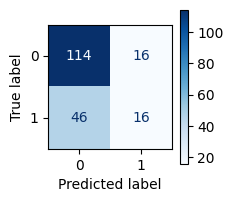

In [16]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)  # Pass the 'ax' to the plot
plt.show()

- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* the Positive Class
- **True Negatives (TN):** we *correctly* the Negative Class
- **False Positives (FP):** we *incorrectly* the Positive Class (a "Type I error")
- **False Negatives (FN):** we *incorrectly* the Negative Class (a "Type II error")

In [17]:
# slice into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print('TP: ', TP)
print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)

TP:  16
TN:  114
FP:  16
FN:  46


## Metrics computed from a confusion matrix

![alt](./../../images/Confusion-matrix-and-Metrics.png)

**Classification Accuracy:** Overall, how often is the classifier correct?

In [18]:
print((TP + TN) / (TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [19]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


**Recall:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Sensitivity"

In [20]:
print(TP / (TP + FN))
print(recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [21]:
print(TP / (TP + FP))
print(precision_score(y_test, y_pred_class))

0.5
0.5


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [22]:
print(TN / (TN + FP))

0.8769230769230769


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [23]:
print(FP / (TN + FP))

0.12307692307692308


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)